In [7]:
import pandas as pd
df = pd.read_csv(r'C:\Github\python_study\Pandas\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
# 불균형 클래스를 고려...
# 평가지표는 f1-score, ROC AUC 등
# 데이터들은 PCA 토앻 변환된 데이터를 제공(데이터의 기밀성을 유지)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [73]:
df.select_dtypes('float','int')
df.select_dtypes('object','category')

""
0
1
2
3
4
...
284802
284803
284804
284805


<function matplotlib.pyplot.show(close=None, block=None)>

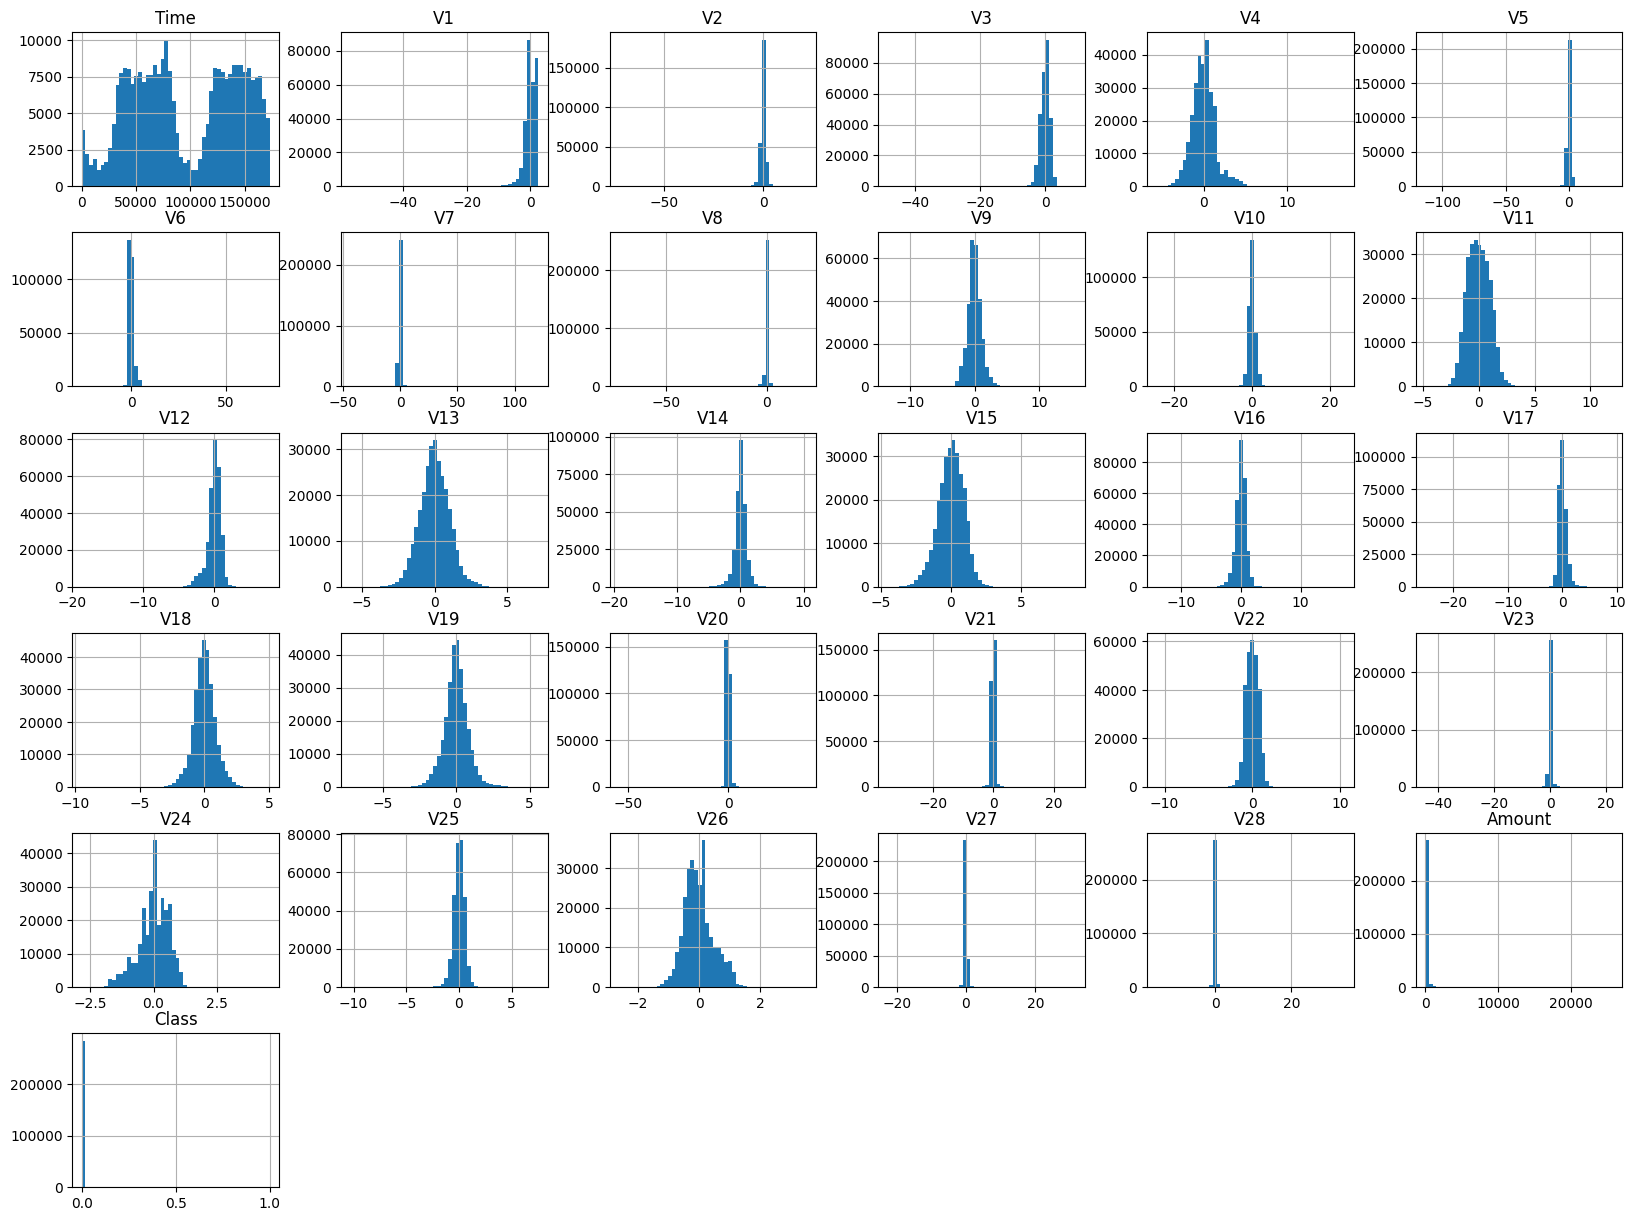

In [40]:
# 필요 라이브러리
# EDA
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show

In [46]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [43]:
# 시간대별 사기 여부 시각화
# df.Time
import seaborn as sns

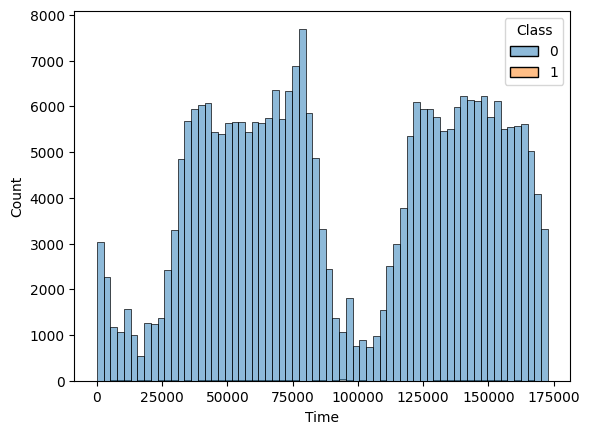

In [44]:
sns.histplot(data=df, x='Time', hue='Class')
plt.show()

<Axes: >

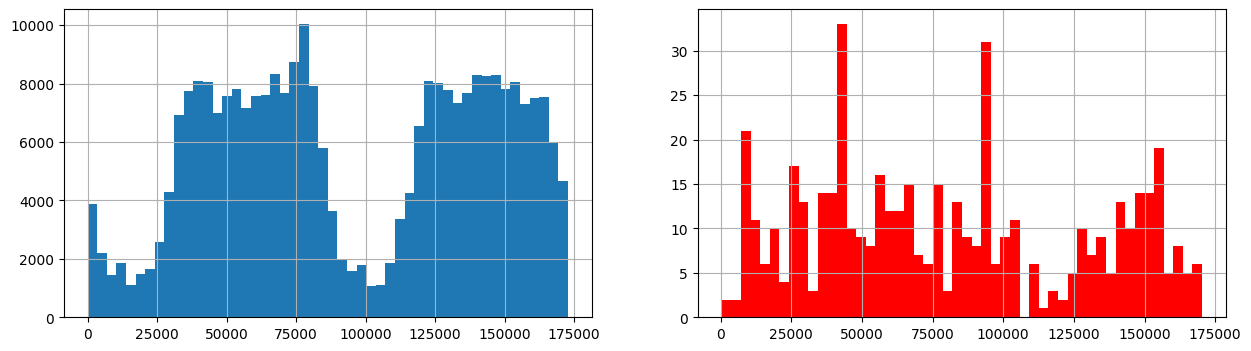

In [50]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df[df['Class']==0]['Time'].hist(bins=50)
plt.subplot(1,2,2)
df[df['Class']==1]['Time'].hist(bins=50, color='red')

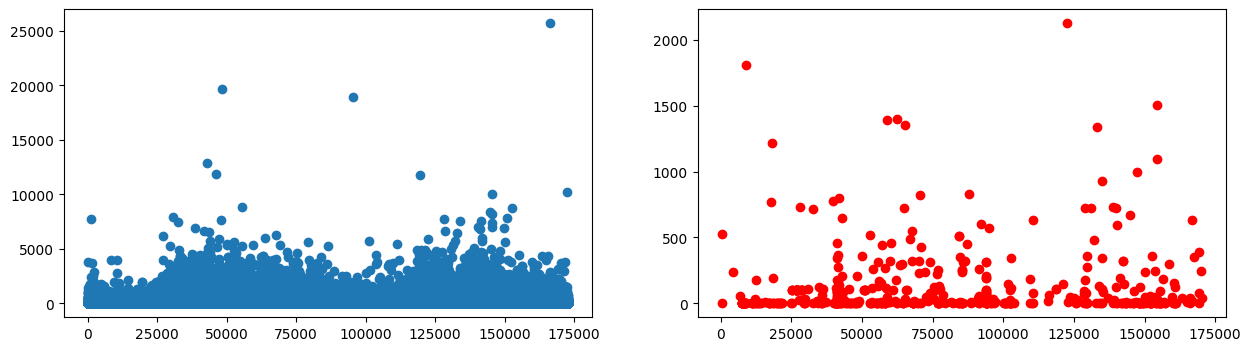

In [54]:
# 시간대별 사기여부 + 거래량
# 클래스가 1일 때 시간과 거래량
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.scatter(x=df[df['Class']==0]['Time'], y=df[df['Class']==0]['Amount'])

plt.subplot(1,2,2)
plt.scatter(x=df[df['Class']==1]['Time'], y=df[df['Class']==1]['Amount'],color='red')


In [60]:
# boxplot Amount, Class


In [ ]:
# 변수들 사이의 상관관계
# 정답에 해당하는 클래스와 시간정보는 제외하고
df.drop(['Class','Time'],axis=1)['Class'] == 